In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
stock_data_test=pd.read_csv('GOOG.csv')
stock_data_train=pd.read_csv('GOOG old.csv')

In [3]:
stock_data_test.head()
stock_data_test.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
247,2021-07-01,2496.995117,2529.250000,2496.995117,2527.370117,2527.370117,856000
248,2021-07-02,2536.790039,2576.959961,2535.379883,2574.379883,2574.379883,1058000
249,2021-07-06,2588.989990,2597.689941,2568.179932,2595.419922,2595.419922,1067500
250,2021-07-07,2606.820068,2612.798096,2595.199951,2601.550049,2601.550049,834000
251,2021-07-08,2565.000000,2600.649902,2560.800049,2583.540039,2583.540039,988300


In [4]:
stock_data_train.head()
stock_data_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1505,2021-07-02,2536.790039,2576.959961,2535.379883,2574.379883,2574.379883,1058000
1506,2021-07-06,2588.989990,2597.689941,2568.179932,2595.419922,2595.419922,1067500
1507,2021-07-07,2606.820068,2612.798096,2595.199951,2601.550049,2601.550049,834000
1508,2021-07-08,2565.000000,2600.649902,2560.800049,2583.540039,2583.540039,989000
1509,2021-07-09,2578.889893,2596.989990,2578.870117,2591.489990,2591.489990,755300


In [5]:
stock_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1510 non-null   object 
 1   Open       1510 non-null   float64
 2   High       1510 non-null   float64
 3   Low        1510 non-null   float64
 4   Close      1510 non-null   float64
 5   Adj Close  1510 non-null   float64
 6   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.7+ KB


In [7]:
#convert to date format
stock_data_train['Date']=pd.to_datetime(stock_data_train['Date'])
stock_data_test['Date']=pd.to_datetime(stock_data_test['Date'])

In [8]:
stock_data_train=stock_data_train.sort_values(by=['Date'],ascending=True)
stock_data_test=stock_data_test.sort_values(by=['Date'],ascending=True)

In [10]:
stock_data_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-13,532.880005,547.109985,532.400024,546.549988,546.549988,2206500
1,2015-07-14,546.760010,565.848999,546.710022,561.099976,561.099976,3244100
2,2015-07-15,560.130005,566.502991,556.789978,560.219971,560.219971,1784600
3,2015-07-16,565.119995,580.679993,565.000000,579.849976,579.849976,4768300
4,2015-07-17,649.000000,674.468018,645.000000,672.929993,672.929993,11164900


## PLOT OUR STOCK

<function matplotlib.pyplot.show(*args, **kw)>

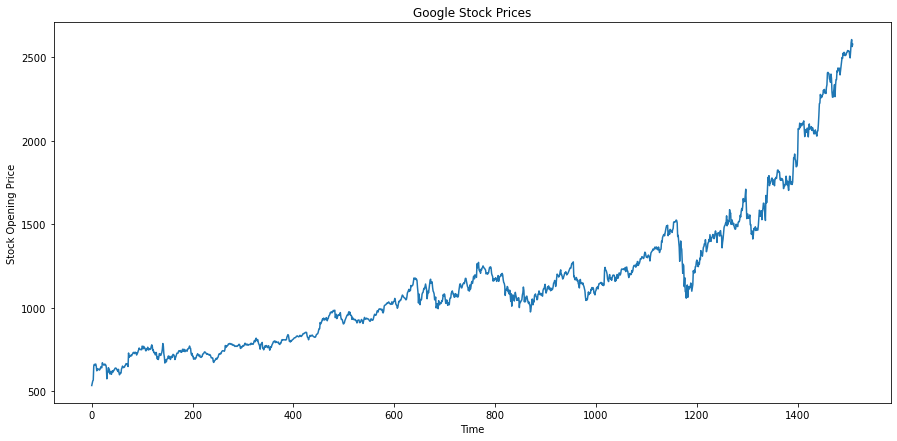

In [11]:
plt.figure(figsize=(15,7))
plt.plot(stock_data_train['Open'])
plt.title("Google Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Opening Price")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

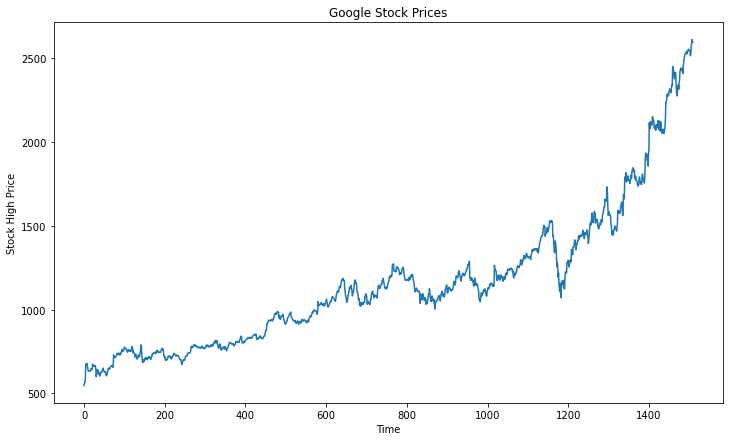

In [12]:
plt.figure(figsize=(12,7))
plt.plot(stock_data_train['High'])
plt.title("Google Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock High Price")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

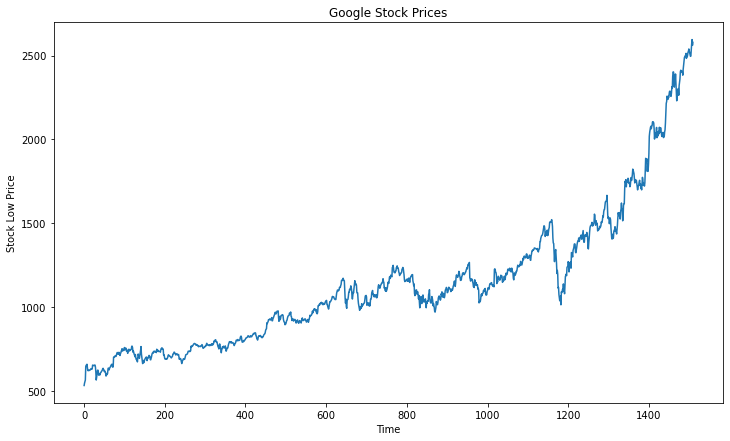

In [13]:
plt.figure(figsize=(12,7))
plt.plot(stock_data_train['Low'])
plt.title("Google Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Low Price")
plt.show

In [14]:
## Feature ESelection

stock_data_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [15]:
input_features=stock_data_train[['Open', 'High', 'Low', 'Close', 'Volume']]
input_features_test=stock_data_train[['Open', 'High', 'Low', 'Close', 'Volume']]

In [16]:
input_data = input_features.values
input_data_test = input_features.values

In [17]:
input_data

array([[5.32880005e+02, 5.47109985e+02, 5.32400024e+02, 5.46549988e+02,
        2.20650000e+06],
       [5.46760010e+02, 5.65848999e+02, 5.46710022e+02, 5.61099976e+02,
        3.24410000e+06],
       [5.60130005e+02, 5.66502991e+02, 5.56789978e+02, 5.60219971e+02,
        1.78460000e+06],
       ...,
       [2.60682007e+03, 2.61279810e+03, 2.59519995e+03, 2.60155005e+03,
        8.34000000e+05],
       [2.56500000e+03, 2.60064990e+03, 2.56080005e+03, 2.58354004e+03,
        9.89000000e+05],
       [2.57888989e+03, 2.59698999e+03, 2.57887012e+03, 2.59148999e+03,
        7.55300000e+05]])

In [18]:
input_data_test

array([[5.32880005e+02, 5.47109985e+02, 5.32400024e+02, 5.46549988e+02,
        2.20650000e+06],
       [5.46760010e+02, 5.65848999e+02, 5.46710022e+02, 5.61099976e+02,
        3.24410000e+06],
       [5.60130005e+02, 5.66502991e+02, 5.56789978e+02, 5.60219971e+02,
        1.78460000e+06],
       ...,
       [2.60682007e+03, 2.61279810e+03, 2.59519995e+03, 2.60155005e+03,
        8.34000000e+05],
       [2.56500000e+03, 2.60064990e+03, 2.56080005e+03, 2.58354004e+03,
        9.89000000e+05],
       [2.57888989e+03, 2.59698999e+03, 2.57887012e+03, 2.59148999e+03,
        7.55300000e+05]])

In [19]:
## Normalize our Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [20]:
input_data[:,:]=scaler.fit_transform(input_data[:,:])
input_data_test[:,:]=scaler.fit_transform(input_data_test[:,:])

In [21]:
input_data[:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.17190634],
       [0.00669258, 0.00907156, 0.00693717, 0.00708029, 0.26781967],
       [0.01313924, 0.00938816, 0.01182371, 0.00665206, 0.13290689],
       ...,
       [1.        , 1.        , 1.        , 1.        , 0.04503563],
       [0.97983545, 0.99411906, 0.98332368, 0.99123601, 0.05936347],
       [0.9865328 , 0.99234729, 0.99208366, 0.99510459, 0.03776079]])

In [22]:
input_data_test[:,:]

array([[0.        , 0.        , 0.        , 0.        , 0.17190634],
       [0.00669258, 0.00907156, 0.00693717, 0.00708029, 0.26781967],
       [0.01313924, 0.00938816, 0.01182371, 0.00665206, 0.13290689],
       ...,
       [1.        , 1.        , 1.        , 1.        , 0.04503563],
       [0.97983545, 0.99411906, 0.98332368, 0.99123601, 0.05936347],
       [0.9865328 , 0.99234729, 0.99208366, 0.99510459, 0.03776079]])

## TRAIN TEST SPLIT

In [23]:
def create_dataset(dataset,lookback=1):
    dataX,dataY=[],[]
    
    for i in range(len(dataset)-lookback-1):
        a=dataset[i:(i+lookback),0]
        
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
        
        return np.array(dataX),np.array(dataY)

In [24]:
trainX,trainY = create_dataset(input_data,lookback=1)

In [25]:
testX,testY = create_dataset(input_data_test,lookback=1)

In [26]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))

## Creating LSTM Model

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.core import Dense
from keras.layers.recurrent import LSTM

In [36]:
model=keras.Sequential()

In [37]:
model.add(LSTM(input_dim=1,output_dim=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(ouput_dim=1))
model.add(Activation('linear'))

TypeError: __init__() missing 1 required positional argument: 'units'

## compile model

In [ ]:
model.compile(optimizer="rmsprop",loss="mse")

In [ ]:
model.fit(trainX,trainY,batch_size=50,epochs=10)

In [ ]:
# Get the models predicted price values 
predictions = model.predict(testX)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - testY) ** 2)))
rmse

In [ ]:
# Plot the data
train = data[:training_data_len]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
def plot_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()
    
#predict lenght consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    
    for i in range(length): 
        predicted = []        
        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        prediction_seqs.append(predicted[-1])
        
    return prediction_seqs



In [ ]:
predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plot_results_multiple(predictions, testY, predict_length)

In [ ]:
from numpy import newaxis